<a href="https://colab.research.google.com/github/Manvi234/ML-Concepts/blob/main/flower_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL
import cv2
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir ="C:\data-science-practice",untar=True)


228813984/228813984 [==============================] - 8s 0us/step


In [5]:
data_dir

'/tmp/.keras/datasets/flower_photos'

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pathlib
data_dir = pathlib.Path(data_dir)

In [8]:
data_dir

PosixPath('/tmp/.keras/datasets/flower_photos')

In [10]:
count_img = len(list(data_dir.glob('*/*.jpg')))

In [11]:
count_img

3670

In [12]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('/tmp/.keras/datasets/flower_photos/roses/15674450867_0ced942941_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/5717319579_190e85c7d1_m.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/15738649506_2b4c2fd933_m.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/14107161906_5737e0e4ec.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/160954292_6c2b4fda65_n.jpg')]

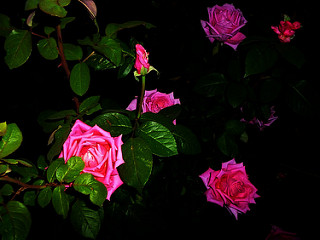

In [13]:
PIL.Image.open(str(roses[0]))

In [15]:
daisy = list(data_dir.glob('daisy/*'))
daisy[:5]

[PosixPath('/tmp/.keras/datasets/flower_photos/daisy/8694909523_3ca25d449d_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/daisy/105806915_a9c13e2106_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/daisy/8740807508_0587f5b7b7.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/daisy/3625257860_33efeef614_m.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/daisy/3275951182_d27921af97_n.jpg')]

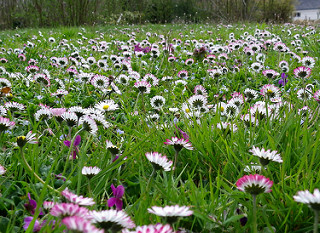

In [16]:
PIL.Image.open(str(daisy[0]))

In [17]:
tulips = list(data_dir.glob('tulips/*'))
tulips[0:5]

[PosixPath('/tmp/.keras/datasets/flower_photos/tulips/8908097235_c3e746d36e_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/tulips/7046815693_f159e96acd_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/tulips/5674707464_dc18de05b1.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/tulips/17719248689_cfd5d2f228_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/tulips/14116826873_d4bab623bf_n.jpg')]

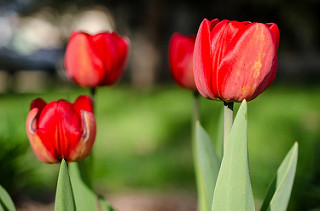

In [18]:
PIL.Image.open(str(tulips[0]))

In [20]:
dandelions = list(data_dir.glob('dandelion/*'))
dandelions[0:5]

[PosixPath('/tmp/.keras/datasets/flower_photos/dandelion/19438516548_bbaf350664.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/dandelion/4589787911_851cb80157_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/dandelion/2521811279_1f7fc353bf_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/dandelion/9533964635_f38e6fa3c3.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/dandelion/479115838_0771a6cdff.jpg')]

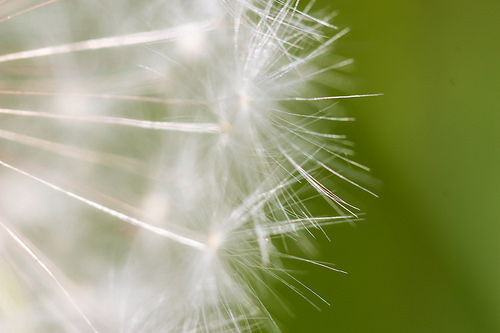

In [22]:
PIL.Image.open(str(dandelions[0]))

In [21]:
sunflowers = list(data_dir.glob('sunflowers/*'))
sunflowers[0:5]

[PosixPath('/tmp/.keras/datasets/flower_photos/sunflowers/4933229561_881d4673e7_m.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/sunflowers/2894191705_a1d2d80c80.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/sunflowers/4414080766_5116e8084e.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/sunflowers/4528959364_fa544b0f4e_m.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/sunflowers/20658775992_1619cd0a9b_n.jpg')]

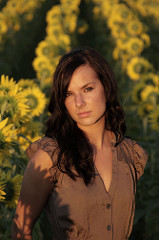

In [23]:
PIL.Image.open(str(sunflowers[0]))

In [38]:
flowers_dict={
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'tulips' : list(data_dir.glob('tulips/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*'))
}

In [34]:
flowers_labels={
    'roses':0,
    'daisy':1,
    'tulips':2,
    'dandelion':3,
    'sunflowers':4
}

In [28]:
img_rose = cv2.imread(str(flowers_dict['roses'][0]))
img_rose

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 4,  0,  0],
        [ 0,  5,  3],
        [ 7, 23, 12],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 2,  0,  0],
        [ 2,  9,  4],
        [ 9, 29, 16],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 1, 11,  5],
        [10, 33, 19],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

In [29]:
img_rose.shape

(240, 320, 3)

In [30]:
cv2.resize(img_rose,(180,180)).shape

(180, 180, 3)

In [41]:
X,y = [],[]

for flower_name,images in flowers_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    img_resized = cv2.resize(img,(180,180))
    X.append(img_resized)
    y.append(flowers_labels[flower_name])



In [43]:
X = np.array(X)
y = np.array(y)

In [44]:
X[0]

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 2,  1,  0],
        [ 4, 19,  7],
        [ 0, 18,  1],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 2,  2,  1],
        [ 7, 26, 12],
        [ 0, 20,  1],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 1,  4,  2],
        [ 8, 31, 16],
        [ 0, 20,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

In [45]:
from sklearn.model_selection import train_test_split

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)

In [50]:
len(X_train)

2752

In [51]:
len(X_test)

918

In [53]:
X_train_scale = X_train/255
X_test_scale = X_test/255

In [54]:
X_train_scale[0]

array([[[0.80392157, 0.49411765, 0.39215686],
        [0.92156863, 0.58431373, 0.47058824],
        [0.89803922, 0.77254902, 0.5254902 ],
        ...,
        [0.62352941, 0.38039216, 0.28627451],
        [0.92941176, 0.89803922, 0.4745098 ],
        [0.95686275, 0.92941176, 0.54509804]],

       [[0.92941176, 0.78431373, 0.52941176],
        [0.92156863, 0.83529412, 0.51764706],
        [0.97647059, 0.90980392, 0.53333333],
        ...,
        [0.76470588, 0.53333333, 0.32941176],
        [0.91764706, 0.85490196, 0.55686275],
        [0.9372549 , 0.83921569, 0.48235294]],

       [[0.85490196, 0.62745098, 0.45490196],
        [0.89411765, 0.6745098 , 0.50588235],
        [0.94901961, 0.74509804, 0.5254902 ],
        ...,
        [0.97254902, 0.78823529, 0.45490196],
        [0.77647059, 0.58823529, 0.41176471],
        [0.76470588, 0.56470588, 0.39215686]],

       ...,

       [[0.03921569, 0.16862745, 0.09803922],
        [0.01176471, 0.25098039, 0.2       ],
        [0.05882353, 0

In [56]:
num_classes = 5
cnn = Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)

])


In [57]:
cnn.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics = ['accuracy'])

In [59]:
cnn.fit(X_train_scale,y_train,epochs=10)

Epoch 1/10
86/86 [==============================] - 113s 1s/step - loss: 0.2470 - accuracy: 0.9153
Epoch 2/10
86/86 [==============================] - 104s 1s/step - loss: 0.1592 - accuracy: 0.9509
Epoch 3/10
86/86 [==============================] - 103s 1s/step - loss: 0.0895 - accuracy: 0.9742
Epoch 4/10
86/86 [==============================] - 105s 1s/step - loss: 0.0366 - accuracy: 0.9913
Epoch 5/10
86/86 [==============================] - 104s 1s/step - loss: 0.0196 - accuracy: 0.9964
Epoch 6/10
86/86 [==============================] - 113s 1s/step - loss: 0.0282 - accuracy: 0.9920
Epoch 7/10
86/86 [==============================] - 107s 1s/step - loss: 0.0500 - accuracy: 0.9862
Epoch 8/10
86/86 [==============================] - 105s 1s/step - loss: 0.0237 - accuracy: 0.9942
Epoch 9/10
86/86 [==============================] - 106s 1s/step - loss: 0.0122 - accuracy: 0.9978
Epoch 10/10
86/86 [==============================] - 105s 1s/step - loss: 0.0580 - accuracy: 0.9862


In [60]:
cnn.evaluate(X_test_scale,y_test)

29/29 [==============================] - 12s 401ms/step - loss: 2.3656 - accuracy: 0.5719


[2.3656394481658936, 0.5718954205513]

In [63]:
predictions = cnn.predict(X_test_scale)
score = tf.nn.softmax(predictions[0])
np.argmax(score)

29/29 [==============================] - 12s 399ms/step


1

In [67]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
])

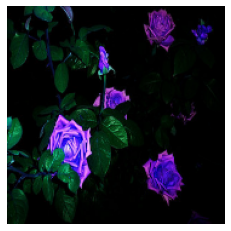

In [68]:
plt.axis('off')
plt.imshow(X[0])

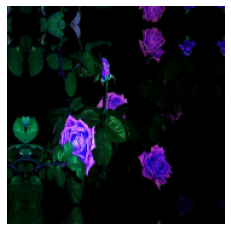

In [70]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

In [71]:
data_augmentation1 = keras.Sequential([
    layers.experimental.preprocessing.RandomContrast(0.3),
])

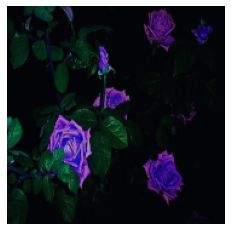

In [72]:
plt.axis('off')
plt.imshow(data_augmentation1(X)[0].numpy().astype('uint8'))

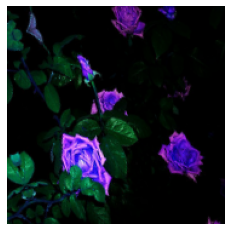

In [73]:
data_augmentation2 = keras.Sequential([
    layers.experimental.preprocessing.RandomRotation(0.3),
])
plt.axis('off')
plt.imshow(data_augmentation2(X)[0].numpy().astype('uint8'))

In [75]:
final_data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 180,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

In [76]:
num_classes = 5

model = Sequential([
  final_data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scale, y_train, epochs=10)    

Epoch 1/10


86/86 [==============================] - 128s 1s/step - loss: 1.3863 - accuracy: 0.3964
Epoch 2/10
86/86 [==============================] - 124s 1s/step - loss: 1.1157 - accuracy: 0.5480
Epoch 3/10
86/86 [==============================] - 134s 2s/step - loss: 1.0077 - accuracy: 0.6017
Epoch 4/10
86/86 [==============================] - 122s 1s/step - loss: 0.9101 - accuracy: 0.6435
Epoch 5/10
86/86 [==============================] - 125s 1s/step - loss: 0.8354 - accuracy: 0.6795
Epoch 6/10
86/86 [==============================] - 120s 1s/step - loss: 0.7976 - accuracy: 0.6933
Epoch 7/10
86/86 [==============================] - 120s 1s/step - loss: 0.7398 - accuracy: 0.7151
Epoch 8/10
86/86 [==============================] - 120s 1s/step - loss: 0.6727 - accuracy: 0.7427
Epoch 9/10
86/86 [==============================] - 120s 1s/step - loss: 0.6535 - accuracy: 0.7413
Epoch 10/10
86/86 [==============================] - 122s 1s/step - loss: 0.6105 - accuracy: 0.7678


In [77]:
model.evaluate(X_test_scale,y_test)

29/29 [==============================] - 11s 363ms/step - loss: 0.8212 - accuracy: 0.7135


[0.8212267160415649, 0.7135076522827148]